# Econometría I

Regresión Lineal Multiple  
Relación entre la escolaridad, experiencia y salario
- Last update: 2026-01-20
- Professor: Marvin Padila
- Teaching Assitant: Facundo Cabral

In [1]:
import pandas as pd
import numpy as np
import wooldridge as woo
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [7]:
df = woo.dataWoo('wage1')
df = df[['educ','exper','wage']].dropna().copy()

df['lwage'] = np.log(df['wage'])
df['exper2'] = df['exper'] ** 2
df = df[['educ','exper','exper2','wage','lwage']]

df.head()

,educ,exper,exper2,wage,lwage
0,11,2,4,3.10,1.131402
1,12,22,484,3.24,1.175573
2,11,2,4,3.00,1.098612
3,8,44,1936,6.00,1.791759
4,12,7,49,5.30,1.667707


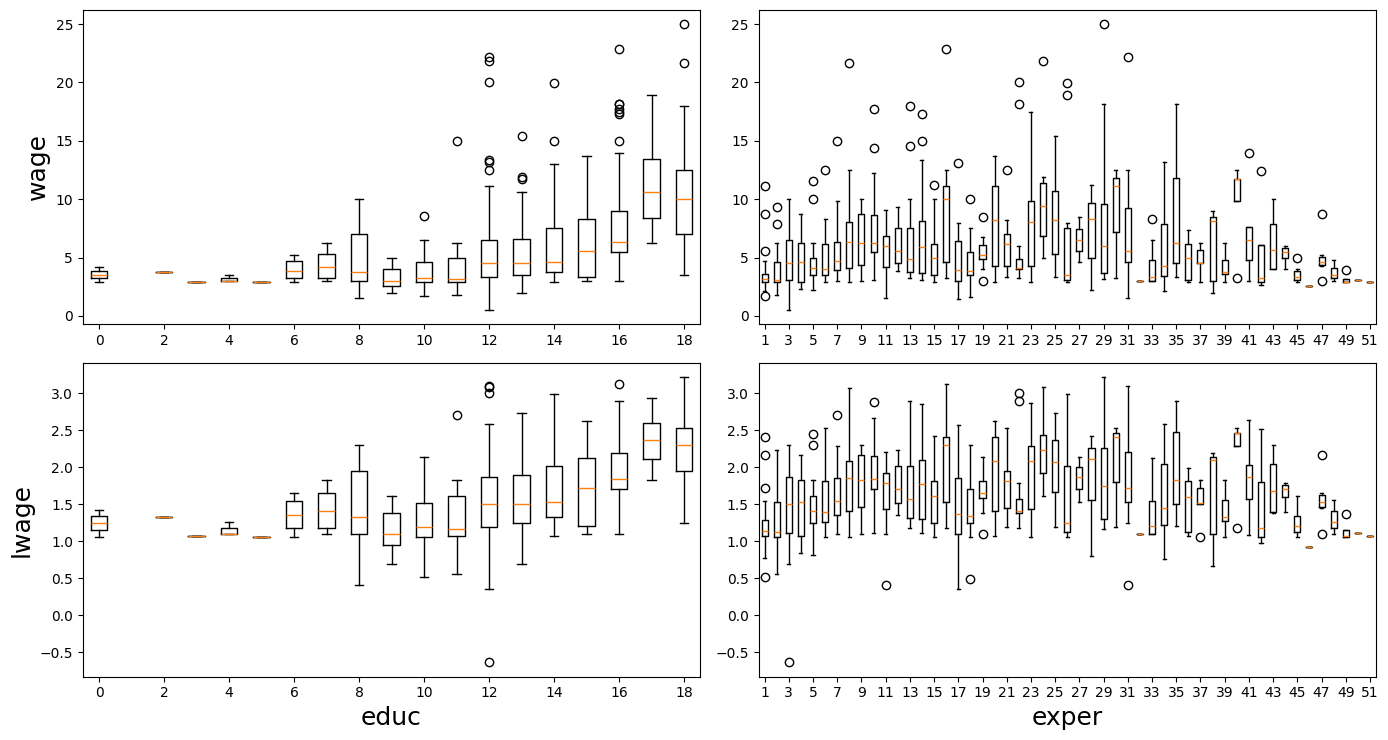

In [18]:
fig, axs   = plt.subplots(2, 2, figsize=(14, 7.5))
educ_vals  = np.arange(min(df['educ']), max(df['educ']) + 1)
exper_vals = np.arange(min(df['exper']), max(df['exper']) + 1)

def box(ax, x, y, values, xlabel, ylabel):
    ax.boxplot(
        [df.loc[x == v, y] for v in values], tick_labels=values, positions=values
    )
    ax.set_xticks(values[::2], values[::2])
    ax.set_xlabel(xlabel, fontsize=18)
    ax.set_ylabel(ylabel, fontsize=18)

box(axs[0,0], df['educ'],  'wage',  educ_vals,  '', 'wage')
box(axs[0,1], df['exper'], 'wage',  exper_vals, '', '')
box(axs[1,0], df['educ'],  'lwage', educ_vals,  'educ',  'lwage')
box(axs[1,1], df['exper'], 'lwage', exper_vals, 'exper', '')

plt.tight_layout()
plt.show()

In [11]:
modelos = {
    "Modelo 1" : "wage ~ educ + exper",
    "Modelo 2" : "wage ~ educ + exper + exper2",
    "Modelo 3" : "lwage ~ educ + exper + exper2"
}

for modelo, formula in modelos.items():
    model = smf.ols(formula, data=df)
    results = model.fit()
    print(
        f'{modelo}: {formula} |', 
        f'R2 adj: {results.rsquared_adj:.4f} |',
        f'Prob(F): {results.f_pvalue:.4g}'
    )
    print(results.summary().tables[1])

Modelo 1: wage ~ educ + exper | R2 adj: 0.2222 | Prob(F): 1.068e-29
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3905      0.767     -4.423      0.000      -4.896      -1.885
educ           0.6443      0.054     11.974      0.000       0.539       0.750
exper          0.0701      0.011      6.385      0.000       0.049       0.092
Modelo 2: wage ~ educ + exper + exper2 | R2 adj: 0.2650 | Prob(F): 2.653e-35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.9649      0.752     -5.271      0.000      -5.443      -2.487
educ           0.5953      0.053     11.228      0.000       0.491       0.700
exper          0.2683      0.037      7.271      0.000       0.196       0.341
exper2        -0.0046      0.001     -5.611      0.000      -0.00

In [15]:
model = smf.ols('lwage ~ educ + exper + exper2', data=df)
results = model.fit()
table = pd.DataFrame({
    'Coefficient': results.params,
    'Std. Error': results.bse,
    't-statistic': results.tvalues,
    'p-value': results.pvalues
})
table

,Coefficient,Std. Error,t-statistic,p-value
Intercept,0.127998,0.105932,1.208296,2.274806e-01
educ,0.090366,0.007468,12.100412,6.979379e-30
exper,0.041009,0.005197,7.891606,1.765073e-14
exper2,-0.000714,0.000116,-6.163888,1.421176e-09


$$\widehat{lwage}_i=0.1280+\underset{(0.0075)}{0.0904}\cdot educ_i+\underset{(0.0052)}{0.0410}\cdot exper_i-\underset{0.0001}{0.0007}\cdot exper^2_i$$

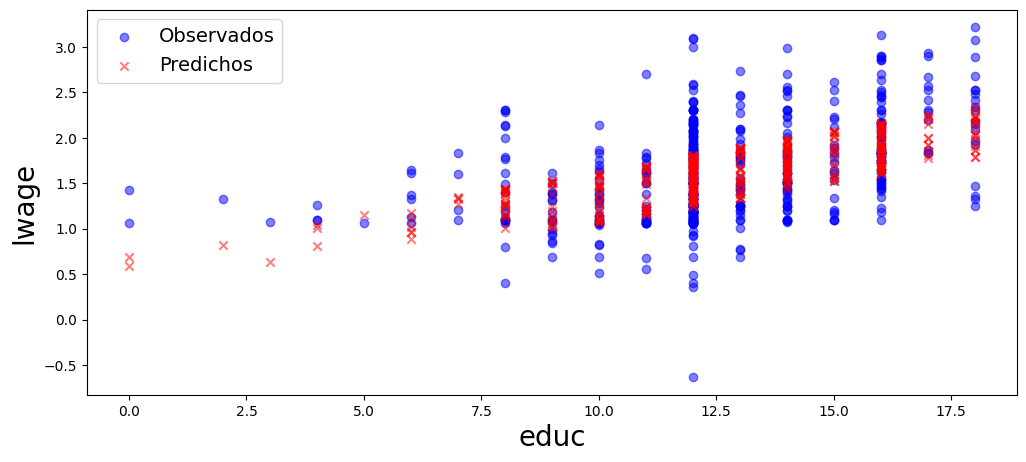

In [17]:
model = smf.ols('lwage ~ educ + exper + exper2', data=df)
results = model.fit()
df['lwage_p'] = results.fittedvalues

fig, ax = plt.subplots(figsize=(12,5))
common = dict(alpha=0.5)
series = [
    ('lwage',    'Observados', 'blue', 'o'),
    ('lwage_p',  'Predichos',  'red',  'x'),
]

for col, label, color, marker in series:
    ax.scatter(
        df['educ'], df[col], color=color,
        marker=marker, label=label, **common
    )

ax.set_xlabel('educ', fontsize=20)
ax.set_ylabel('lwage', fontsize=20)
ax.legend(fontsize=14)
plt.show()